# MATLAB vs TensorFlow vs PyTorch

This is the example that will be covered in this notebook:
https://yanndebray.github.io/matlab-with-python-book/5_Call_Python_AI_libraries_from_MATLAB.html#52-call-tensorflow-from-matlab

- Start by changing the runtime to a GPU
- Execute the following bash script to get MATLAB:
https://gist.github.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9
- Add more toolboxes as needed to the line `mpm install --products=MATLAB Parallel_Computing_Toolbox Deep_Learning_Toolbox Statistics_and_Machine_Learning_Toolbox`
https://www.mathworks.com/help/install/ug/mpminstall.html
(you can get the list from this page, replace the spaces by underscores_ https://www.mathworks.com/products.html)


More resources:
- https://www.youtube.com/watch?v=rhlBOJdmVkg&ab_channel=YannDebray
- https://blogs.mathworks.com/deep-learning/2023/07/26/matlab-with-tensorflow-from-your-jupyter-notebook/
- https://www.mathworks.com/help/deeplearning/ref/exportnetworktotensorflow.html

In [5]:
!nvidia-smi

Fri Aug 15 20:20:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!wget https://gist.githubusercontent.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9/raw/c840eae32fb8be4b0b90fc852b43f719ec89bbff/get_matlab_on_colab.sh

--2025-08-15 20:10:48--  https://gist.githubusercontent.com/yanndebray/e267617c78a3f24c875cb57570bdd3b9/raw/c840eae32fb8be4b0b90fc852b43f719ec89bbff/get_matlab_on_colab.sh
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 844 [text/plain]
Saving to: ‘get_matlab_on_colab.sh’

get_matlab_on_colab 100%[===================>]     844  --.-KB/s    in 0s      

2025-08-15 20:10:48 (52.5 MB/s) - ‘get_matlab_on_colab.sh’ saved [844/844]



In [3]:
!chmod +x get_matlab_on_colab.sh

In [ ]:
# !./get_matlab_on_colab.sh # run in the terminal

In [4]:
from google.colab import output
output.serve_kernel_port_as_window(3000, path='/')

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

## Fashion MNIST Dataset

In [6]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
import os
# move to drive content
os.chdir('/content/drive/MyDrive/Python/fashion')

## MATLAB Deep Learning toolbox

On the MATLAB side, type:
`>> matlab.engine.shareEngine`

In [9]:
import matlab.engine
m = matlab.engine.connect_matlab()
# m.who()

In [10]:
m.workspace['train_images'] = train_images
m.workspace['train_labels'] = train_labels
m.workspace['test_images'] = test_images
m.workspace['test_labels'] = test_labels

In [11]:
import io
out = io.StringIO()
m.whos(nargout=0, stdout=out)
print(out.getvalue())

  Name                  Size                  Bytes  Class    Attributes

  test_images       10000x28x28             7840000  uint8              
  test_labels           1x10000               10000  uint8              
  train_images      60000x28x28            47040000  uint8              
  train_labels          1x60000               60000  uint8              




In [12]:
XTrain, YTrain, XTest, YTest = m.reorder(train_images,train_labels,test_images,test_labels, nargout=4)

In [13]:
m.workspace['XTrain'] = XTrain
m.workspace['YTrain'] = YTrain
m.workspace['XTest'] = XTest
m.workspace['YTest'] = YTest

Open `deepNetworkDesigner` in MATLAB to design the network interactively

In [14]:
m.deepNetworkDesigner(nargout=0)

In [15]:
net_1 = m.workspace['net_1']

In [16]:
net_1 = m.trainMyNetwork(XTrain,YTrain,net_1)

In [17]:
m.workspace['net_1'] = net_1

In [19]:
m.exportNetworkToTensorFlow(net_1, 'fashionNet1',nargout=0)

In [20]:
import tensorflow as tf

In [21]:
import fashionNet1
model = fashionNet1.load_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ imageinput_unnormalized         │ (None, 28, 28, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ imageinput_ (Normalization)     │ (None, 28, 28, 1)      │         1,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 1, 28, 28)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_ (Dense)                     │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1_ (Dense)                   │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,339 (403.67 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 1,569 (6.13 KB)

In [22]:
prediction = model.predict(test_images, verbose=2)
prediction

313/313 - 2s - 6ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])
# model.evaluate(test_images,  test_labels, verbose=2)

## TensorFlow

https://www.tensorflow.org/tutorials/keras/classification

In [23]:
import tensorflow as tf

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6526 - loss: 10.0392
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7074 - loss: 0.7445
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7478 - loss: 0.6398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7816 - loss: 0.5735
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8105 - loss: 0.5317
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8279 - loss: 0.4959
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8272 - loss: 0.5006
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8376 - loss: 0.4804
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8414 - loss: 0.4556
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8446 - loss: 0.4481


In [27]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.8393 - loss: 0.5145


[0.5145196318626404, 0.8392999768257141]

In [28]:
prediction = model.predict(test_images, verbose=2)
prediction

313/313 - 1s - 2ms/step


array([[  -5.295601 ,    1.7297986,  -64.449    , ...,   18.672903 ,
           1.6372106,   19.667528 ],
       [  15.350934 ,   17.443457 ,   19.867666 , ..., -107.464264 ,
          12.179552 ,  -30.508665 ],
       [  88.13161  ,  110.51796  ,   47.112595 , ..., -501.34988  ,
          69.528656 , -164.15944  ],
       ...,
       [  46.80477  ,   29.368752 ,   41.983044 , ...,   31.463593 ,
          69.471756 ,   37.200256 ],
       [  67.77368  ,   97.693825 ,  -51.15657  , ..., -111.47554  ,
          73.745476 ,  -24.082878 ],
       [ -40.14925  ,  -76.09702  ,  -71.48579  , ...,   22.70182  ,
           1.6752492,   15.0740795]], dtype=float32)

In [29]:
from sklearn.metrics import accuracy_score
import numpy as np
predicted_labels = np.argmax(prediction, axis=1)
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8393


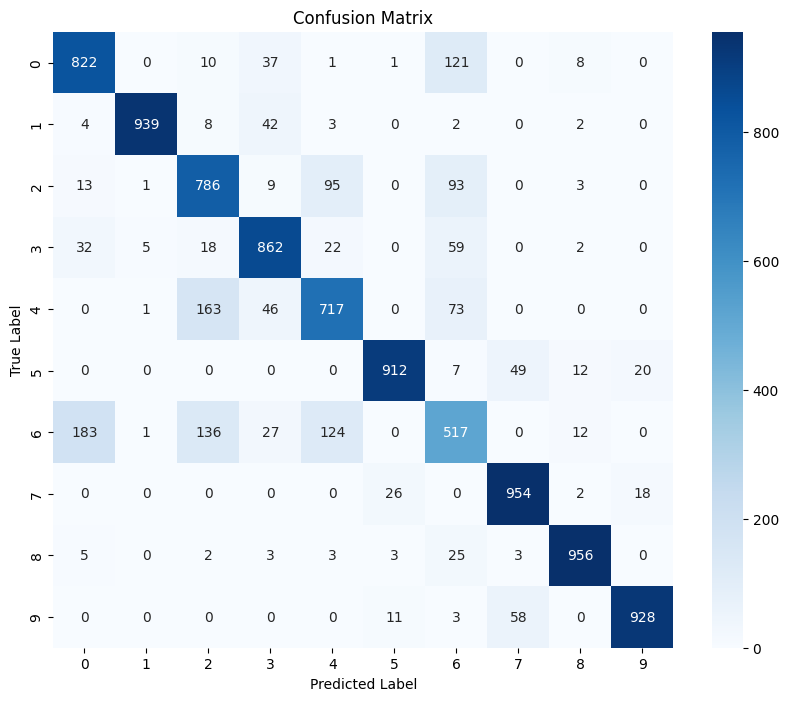

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.export('tf_model')

## PyTorch

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [32]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 168kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.8MB/s]


In [33]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [34]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [36]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [37]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [38]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.292064  [   64/60000]
loss: 0.742097  [ 6464/60000]
loss: 0.437662  [12864/60000]
loss: 0.656818  [19264/60000]
loss: 0.504358  [25664/60000]
loss: 0.499053  [32064/60000]
loss: 0.439849  [38464/60000]
loss: 0.627083  [44864/60000]
loss: 0.577396  [51264/60000]
loss: 0.505385  [57664/60000]
Test Error: 
 Accuracy: 84.1%, Avg loss: 0.453473 

Epoch 2
-------------------------------
loss: 0.307984  [   64/60000]
loss: 0.411012  [ 6464/60000]
loss: 0.312167  [12864/60000]
loss: 0.475314  [19264/60000]
loss: 0.414393  [25664/60000]
loss: 0.371676  [32064/60000]
loss: 0.379096  [38464/60000]
loss: 0.579391  [44864/60000]
loss: 0.515437  [51264/60000]
loss: 0.485813  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.416960 

Epoch 3
-------------------------------
loss: 0.256055  [   64/60000]
loss: 0.333091  [ 6464/60000]
loss: 0.252524  [12864/60000]
loss: 0.410300  [19264/60000]
loss: 0.367881  [25664/60000]
loss: 0.345689  [32064/600

In [39]:
torch.save(model.state_dict(), "pt_model.pth")
print("Saved PyTorch Model State to pt_model.pth")

Saved PyTorch Model State to pt_model.pth


In [40]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("pt_model.pth", weights_only=True))

<All keys matched successfully>

In [41]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [42]:
all_preds = []
all_targets = []

with torch.no_grad():
    for xb, yb in test_dataloader:          # iterate over the entire test set
        xb = xb.to(device)
        logits = model(xb)               # shape: [batch, num_classes]
        preds = logits.argmax(dim=1)     # predicted class indices
        all_preds.append(preds.cpu())
        all_targets.append(yb.cpu())

y_true = torch.cat(all_targets).numpy()  # shape: (N,)
y_pred = torch.cat(all_preds).numpy()    # shape: (N,)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8743


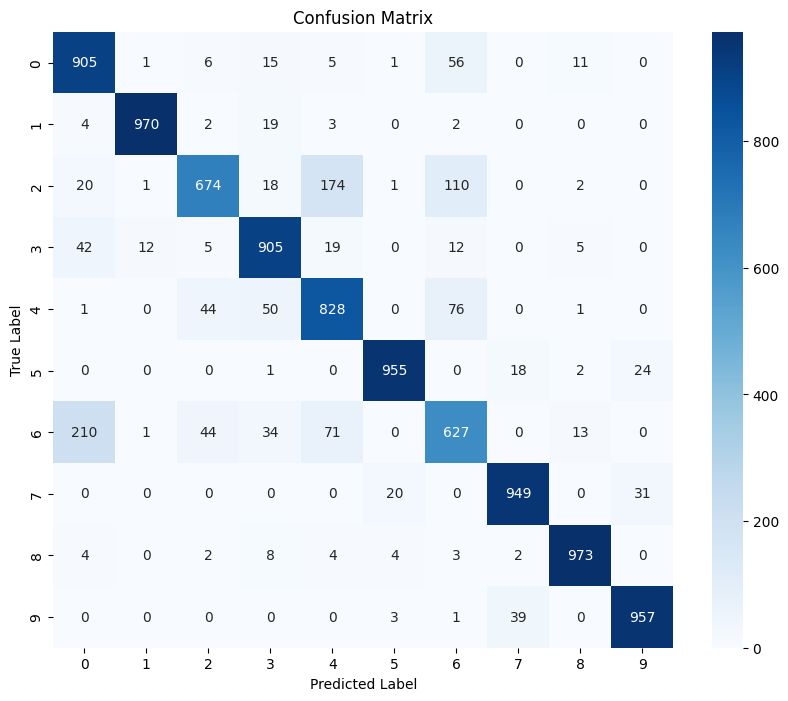

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()